In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Banking.csv')
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
df.shape

(164309, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

From the above information, we notice that **Loan_Amount_Requested** is in incorrect type, I will be replcing comma to dot in that column and converting to float64 type

In [6]:
 df['Loan_Amount_Requested']= df['Loan_Amount_Requested'].str.replace(',','.')

In [7]:
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].astype(np.float64)

In [8]:
# we use value_counts() to display how many instances are present in the
# categorical feature/class variable
df['Interest_Rate'].value_counts()

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

### **Preprocessing Data**

Preprocessing data includes handling missing values and outliers, applying feature coding techniques if needed, scale & standardize features.



**Checking for Missing values**

In [9]:
# isnull() method can be used to check each cell in the dataset
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

**Handling Outliers**

We check for outliers only in the features that contain numerical values.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

1. Checking the **'Annual_Income'** feature for outliers

Annual_Income Shape: (164309, 14)


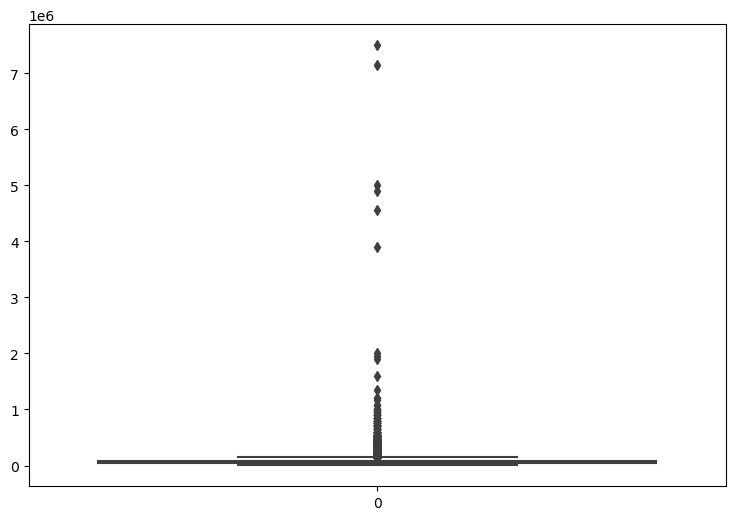

In [11]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for age feature
print("Annual_Income Shape:",df.shape)
## Max and Min Quantile
max_val = df['Annual_Income'].quantile(0.75)
min_val = df['Annual_Income'].quantile(0.25)

sns.boxplot(df['Annual_Income'])
plt.show()

When checking the boxplot for **Annual_Income** feature, we can see that the values has started breaking from a point around 2x1e6. Therefore I will be removing the outliers after $incomes=2 \times 1e6$

After Annual_Income Shape: (139200, 14)


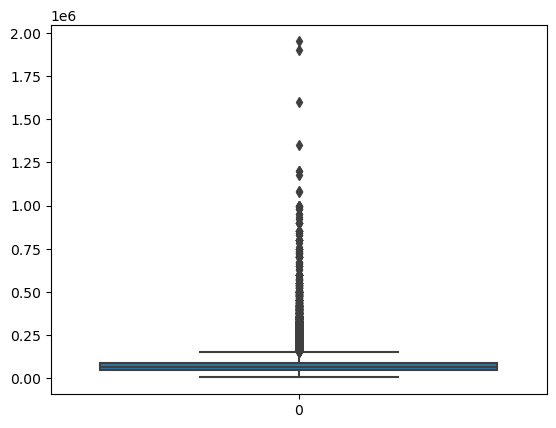

In [12]:
# removing datapoints that have income values greater than 2 x 1e6
df = df[(df['Annual_Income']< 2e6)]

print("After Annual_Income Shape:",df.shape)

sns.boxplot(df['Annual_Income'])
plt.show()

2. Checking the **'Debt_To_Income'** feature for outliers

Debt_To_Income Shape: (139200, 14)


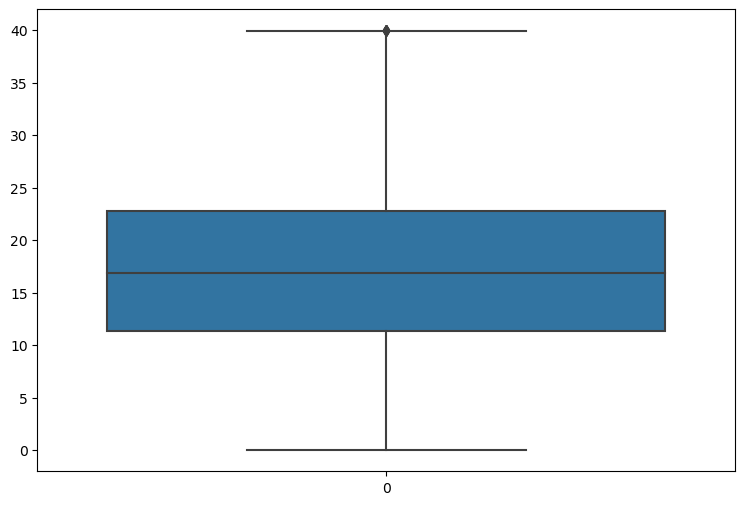

In [13]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for age feature
print("Debt_To_Income Shape:",df.shape)
## Max and Min Quantile
max_val = df['Debt_To_Income'].quantile(0.75)
min_val = df['Debt_To_Income'].quantile(0.25)

sns.boxplot(df['Debt_To_Income'])
plt.show()

There are no outliers in the **Debt_to_income** feature.

3. Checking the **'Inquiries_Last_6Mo'** feature for outliers

Inquiries_Last_6Mo Shape: (139200, 14)


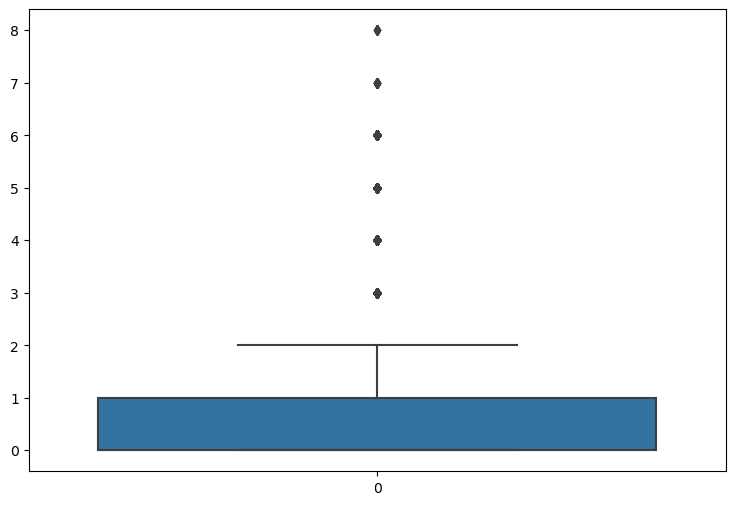

In [14]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for age feature
print("Inquiries_Last_6Mo Shape:",df.shape)
## Max and Min Quantile
max_val = df['Inquiries_Last_6Mo'].quantile(0.75)
min_val = df['Inquiries_Last_6Mo'].quantile(0.25)

sns.boxplot(df['Inquiries_Last_6Mo'])
plt.show()

When checking the boxplot for the **'Inquiries_Last_6Mo'** feature, we can see that there are no significant outliers, and that there are many datapoints that are outside the boxplot. Therefore, I will not be removing the datapoints that are identified here as outliers, since they can carry information in them.

4. Checking the **'Months_Since_Deliquency'** feature for outliers

Months_Since_Deliquency Shape: (139200, 14)


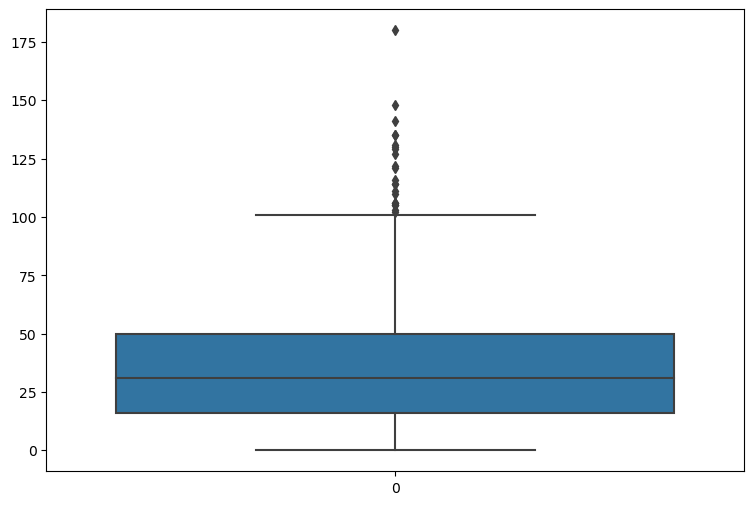

In [15]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for age feature
print("Months_Since_Deliquency Shape:",df.shape)
## Max and Min Quantile
max_val = df['Months_Since_Deliquency'].quantile(0.75)
min_val = df['Months_Since_Deliquency'].quantile(0.25)

sns.boxplot(df['Months_Since_Deliquency'])
plt.show()

When checking the boxplot for the **'Months_Since_Deliquency'** feature, we can see that there are no significant outliers, and that there are many datapoints that are outside the boxplot. Therefore, I will not be removing the datapoints that are identified here as outliers, since they can carry information in them.

5. Checking the **'Number_Open_Accounts'** feature for outliers  

Number_Open_Accounts Shape: (139200, 14)


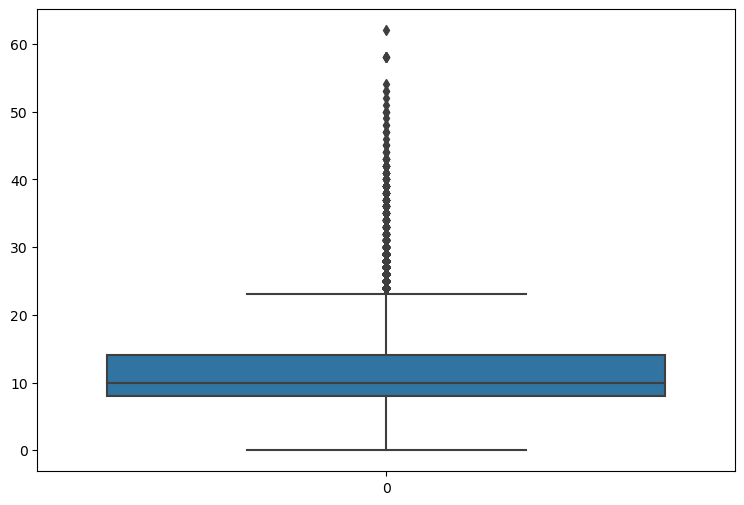

In [16]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for age feature
print("Number_Open_Accounts Shape:",df.shape)
## Max and Min Quantile
max_val = df['Number_Open_Accounts'].quantile(0.75)
min_val = df['Number_Open_Accounts'].quantile(0.25)

sns.boxplot(df['Number_Open_Accounts'])
plt.show()

When checking the above box plot, we can see that, there a significant gap has first occured around the number accounts value 58. Therefore I decided to clear the datapoints after number accounts 58 as handling outliers in this feature.

After Number_Open_Accounts Shape: (139195, 14)


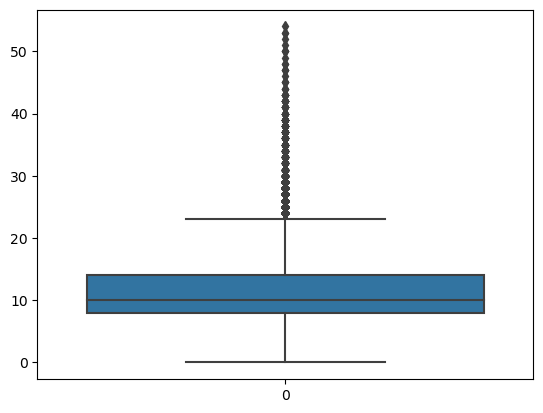

In [17]:
# removing datapoints that have number open accounts greater than 58
df = df[(df['Number_Open_Accounts']<58)]

print("After Number_Open_Accounts Shape:",df.shape)

sns.boxplot(df['Number_Open_Accounts'])
plt.show()

6. Checking the **'Total_Accounts'** feature for outliers   

Total_Accounts Shape: (139195, 14)


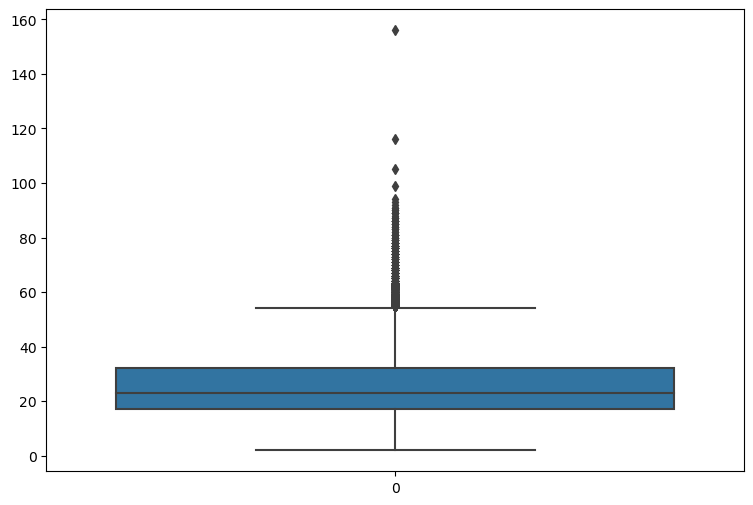

In [18]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for age feature
print("Total_Accounts Shape:",df.shape)
## Max and Min Quantile
max_val = df['Total_Accounts'].quantile(0.75)
min_val = df['Total_Accounts'].quantile(0.25)

sns.boxplot(df['Total_Accounts'])
plt.show()

When checking the above box plot, we can see that, there a significant gap has first occured around the total accounts value 120. Therefore I decided to clear the datapoints after total accounts 120 as handling outliers in this feature

After Total_Accounts shape: (139194, 14)


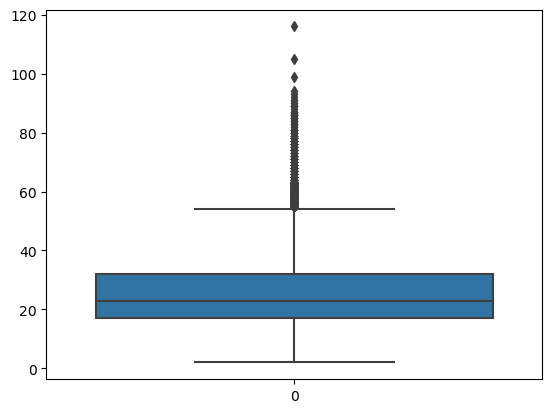

In [19]:
# removing datapoints that have total accounts greater than 120
df = df[(df['Total_Accounts']<120)]

print("After Total_Accounts shape:",df.shape)

sns.boxplot(df['Total_Accounts'])
plt.show()

7. Checking the **'Loan_Amount_Requested'** feature for outliers

Loan_Amount_Requested Shape: (139194, 14)


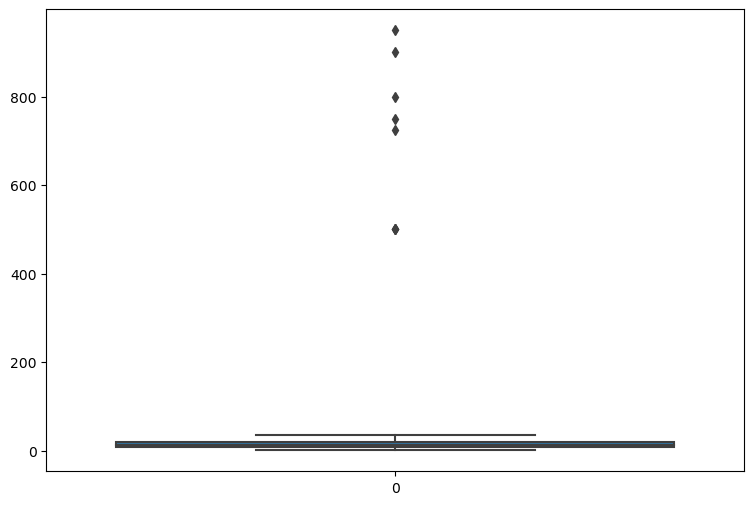

In [20]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for age feature
print("Loan_Amount_Requested Shape:",df.shape)
## Max and Min Quantile
max_val = df['Loan_Amount_Requested'].quantile(0.75)
min_val = df['Loan_Amount_Requested'].quantile(0.25)

sns.boxplot(df['Loan_Amount_Requested'])
plt.show()

After Loan_Amount_Requested Shape: (139186, 14)


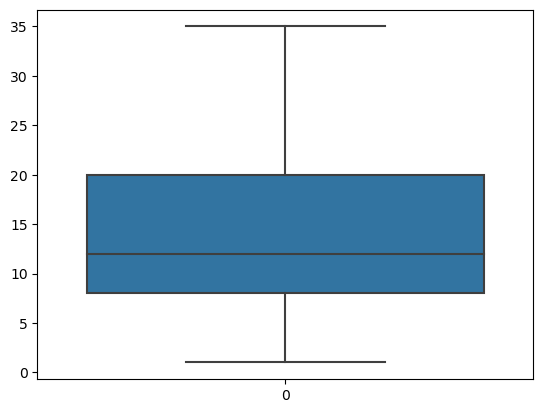

In [21]:
# removing datapoints that have income values greater than 50
df = df[(df['Loan_Amount_Requested']< 50)]

print("After Loan_Amount_Requested Shape:",df.shape)

sns.boxplot(df['Loan_Amount_Requested'])
plt.show()

Now, after carefully inspection of all the numerical fields (features) in the dataset, I have removed outliers and the remaining number datapoints is 139186. Therefore I have removed $164309 - 139186 = 25123$ outliers.

**Feature Encoding**

In this process, the categorical data are encoded into numerical data. The LabelEncoder is used to encode the class values to integers accordingly as follows.



In [22]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7.000,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
2,10000003,24.725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,16.000,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,17.000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1
5,10000006,4.500,2 years,Rent,30000.0,VERIFIED - income source,credit_card,10.88,1,NaN,12,15,Male,3


In [23]:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             6247
Home_Owner                 21434
Annual_Income                  0
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    74855
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

df['Length_Employed'].value_counts()

10+ years    44814
2 years      12405
3 years      10963
< 1 year     10861
5 years       9136
1 year        8827
4 years       8314
7 years       7904
6 years       7754
8 years       6658
9 years       5303
Name: Length_Employed, dtype: int64

In [25]:
df['Home_Owner'].value_counts()

Mortgage    59561
Rent        47549
Own         10593
Other          39
None           10
Name: Home_Owner, dtype: int64

In [26]:
# replace NaN values with mean value
df.Months_Since_Deliquency = df.Months_Since_Deliquency.fillna(df.Months_Since_Deliquency.median())

In [27]:
df.Length_Employed = df.Length_Employed.fillna('< 1 year')
df.Home_Owner = df.Home_Owner.fillna('Other')

In [28]:
df.isnull().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

In [29]:
categorical_features = ['Income_Verified', 'Purpose_Of_Loan','Length_Employed','Home_Owner']

encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

In [30]:
binary_valued_features = ['Gender']
bin_dict = {'Female':0, 'Male':1}
# Replace binary values in df using the provided dictionary
for item in binary_valued_features:
  df.replace({item:bin_dict},inplace=True)

**Removing Unwanted Feature**

In [31]:
df.drop(['Loan_ID'], inplace=True, axis = 1)
df

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7.000,10,4,68000.0,2,0,18.37,0,31.0,9,14,0,1
2,24.725,7,0,75566.4,1,2,15.88,0,31.0,12,16,1,3
3,16.000,10,2,56160.0,1,2,14.34,3,31.0,16,22,1,3
4,17.000,8,3,96000.0,1,2,22.17,1,31.0,19,30,0,1
5,4.500,2,4,30000.0,1,1,10.88,1,31.0,12,15,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164298,25.000,0,0,70000.0,1,11,0.79,0,31.0,8,27,1,2
164299,3.000,3,0,45000.0,1,6,8.43,2,31.0,25,36,1,2
164300,24.000,0,4,108000.0,1,9,14.30,0,22.0,12,36,0,3
164302,24.000,2,2,110000.0,0,2,15.87,1,6.0,22,38,1,2


After this point, we have encoded all the values in the dataset into numerical values

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139186 entries, 0 to 164303
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    139186 non-null  float64
 1   Length_Employed          139186 non-null  int32  
 2   Home_Owner               139186 non-null  int32  
 3   Annual_Income            139186 non-null  float64
 4   Income_Verified          139186 non-null  int32  
 5   Purpose_Of_Loan          139186 non-null  int32  
 6   Debt_To_Income           139186 non-null  float64
 7   Inquiries_Last_6Mo       139186 non-null  int64  
 8   Months_Since_Deliquency  139186 non-null  float64
 9   Number_Open_Accounts     139186 non-null  int64  
 10  Total_Accounts           139186 non-null  int64  
 11  Gender                   139186 non-null  int64  
 12  Interest_Rate            139186 non-null  int64  
dtypes: float64(4), int32(4), int64(5)
memory usage: 16.8 MB


In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loan_Amount_Requested,139186.0,14.341977,8.283202,1.0,8.00,12.00,20.00,35.00
Length_Employed,139186.0,3.990143,3.360068,0.0,1.00,3.00,7.00,10.00
Home_Owner,139186.0,1.903431,1.773431,0.0,0.00,2.00,4.00,4.00
Annual_Income,139186.0,73084.677714,47665.957284,4000.0,45000.00,63000.00,88664.50,1950000.00
Income_Verified,139186.0,0.954859,0.821923,0.0,0.00,1.00,2.00,2.00
Purpose_Of_Loan,139186.0,2.645359,2.394458,0.0,2.00,2.00,2.00,13.00
Debt_To_Income,139186.0,17.206382,7.845499,0.0,11.37,16.84,22.78,39.99
Inquiries_Last_6Mo,139186.0,0.781946,1.035179,0.0,0.00,0.00,1.00,8.00
Months_Since_Deliquency,139186.0,32.486292,14.881628,0.0,31.00,31.00,31.00,180.00
Number_Open_Accounts,139186.0,11.191054,4.980720,0.0,8.00,10.00,14.00,54.00


**Splitting Data**

In [34]:
y = df['Interest_Rate']
X = df.values[:, :-1] # get all columns except the last column

# spliting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

Here when using train_test_split, we use a random_state initializing value to make sure that the data splitting is done in the same way even in a different run of the code.

**Feature Scaling**

After encoding categorical data, the dataset consists of features with different data ranges. These values are standardized and feature scaling is done as follows. Numerical features were scaled by removing the
mean and by scaling to unit variance (StandardScaler) as follows.

In [35]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

### **Feature Engineering**

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of our model. The data features that we use to train your machine learning models have a huge influence on the performance we can achieve. Irrelevant or partially relevant features can negatively impact model performance.

**Drawing the Correlation Matrix**

Therefore I will be performing the Correlation Coefficient checking mechanism in order to check the relationship between the different features with the output.

Each of those correlation types can exist in a spectrum represented by values from 0 to 1 where slightly or highly positive correlation features can be something like 0.5 or 0.7. If there is a strong and perfect positive correlation, then the result is represented by a correlation score value of 0.9 or 1.

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,-0.079753,-0.191634,0.428829,-0.360065,-0.155211,0.059496,-0.007793,-0.031293,0.201842,0.232726,0.000330
1,-0.079753,1.000000,0.065606,-0.088578,-0.052624,0.012277,-0.002118,-0.001078,0.018644,-0.039750,-0.067564,-0.002030
2,-0.191634,0.065606,1.000000,-0.199644,0.078182,0.035908,0.001198,-0.054307,0.026476,-0.124634,-0.212384,0.003004
3,0.428829,-0.088578,-0.199644,1.000000,-0.118595,0.011209,-0.209011,0.068372,-0.044064,0.179346,0.255948,-0.001909
4,-0.360065,-0.052624,0.078182,-0.118595,1.000000,0.011815,-0.115725,-0.065903,-0.004201,-0.065982,-0.099057,-0.004148
5,-0.155211,0.012277,0.035908,0.011209,0.011815,1.000000,-0.108923,0.052883,-0.002517,-0.088531,-0.070522,0.001068
6,0.059496,-0.002118,0.001198,-0.209011,-0.115725,-0.108923,1.000000,-0.005432,0.000642,0.304330,0.232509,-0.000852
7,-0.007793,-0.001078,-0.054307,0.068372,-0.065903,0.052883,-0.005432,1.000000,0.010991,0.099036,0.130524,-0.000260
8,-0.031293,0.018644,0.026476,-0.044064,-0.004201,-0.002517,0.000642,0.010991,1.000000,-0.026220,-0.023038,-0.002283
9,0.201842,-0.039750,-0.124634,0.179346,-0.065982,-0.088531,0.304330,0.099036,-0.026220,1.000000,0.681338,0.001435


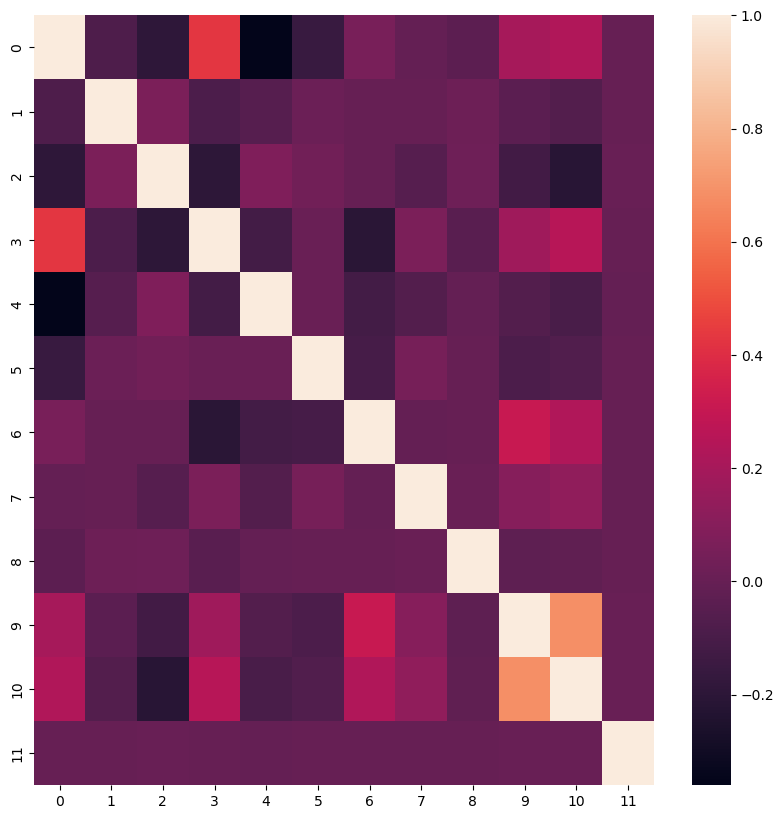

In [37]:
# draw the correlation matrix
correlation_matrix = pd.DataFrame(X_train).corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(correlation_matrix, ax=ax)
correlation_matrix

After generating the correlation matrix, we can see that to the right side of the matrix, there are features that has a very high correlation. We usually remove such features that have high correlations because, they are some what linearly dependent with other features. These features contribute very less in predicting the output but increses the computational cost.

It is clear that correlated features means that they bring the same information, so it is logical to remove one of them.

In order to find the exact columns that has the high correlation values, I perform the below code. I am checking the upper triangle of the correlation matrix because the upper and lower traingles are mirrors of each other that are divided by the diagonal in the correlation matrix. Here I am checking the columns that has correlations values more than 0.6 with the hope of removing them.

In [38]:
# getting the upper triangle of the correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

# checking which columns can be dropped
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('\nTo drop')
print(to_drop)

# removing the selected columns
X_train = X_train.drop(X_train.columns[to_drop], axis=1)
X_test = X_test.drop(X_test.columns[to_drop], axis=1)
print(X_train.head())

    0         1         2         3         4         5         6         7   \
0  NaN -0.079753 -0.191634  0.428829 -0.360065 -0.155211  0.059496 -0.007793   
1  NaN       NaN  0.065606 -0.088578 -0.052624  0.012277 -0.002118 -0.001078   
2  NaN       NaN       NaN -0.199644  0.078182  0.035908  0.001198 -0.054307   
3  NaN       NaN       NaN       NaN -0.118595  0.011209 -0.209011  0.068372   
4  NaN       NaN       NaN       NaN       NaN  0.011815 -0.115725 -0.065903   
5  NaN       NaN       NaN       NaN       NaN       NaN -0.108923  0.052883   
6  NaN       NaN       NaN       NaN       NaN       NaN       NaN -0.005432   
7  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11 NaN       NaN       NaN       NaN    

However, after performing the above code, we can see that there are no columns that has more than 0.95 correlation and that therefore, there are no columns to be removed.

**Appyling PCA**

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [39]:
from sklearn.decomposition import PCA

# apply the PCA for feature for feature reduction
pca = PCA(n_components=0.95)
pca.fit(X_train)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)

X_train

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.644919,1.788618,-1.073308,-0.333251,-1.161742,-0.269523,-0.765586,1.176664,-0.099875,-0.439909,-0.696922,0.634867
1,0.803801,-0.592295,-1.073308,0.964253,0.054921,-0.687156,-1.200232,-0.755376,-0.099875,-0.841458,-0.610499,-1.575133
2,-0.584556,-0.294680,-1.073308,-0.757035,-1.161742,-0.687156,0.758861,0.210644,-0.099875,1.166291,0.512993,0.634867
3,-0.041286,-0.592295,1.182214,-0.022756,1.271585,-0.269523,0.187830,-0.755376,1.109675,0.162416,1.463641,-1.575133
4,0.079441,-0.889909,1.182214,0.007454,1.271585,2.653904,-0.310546,2.142684,-0.099875,-0.439909,1.722909,0.634867
...,...,...,...,...,...,...,...,...,...,...,...,...
111343,0.200168,-0.889909,-1.073308,-0.631159,-1.161742,-0.269523,0.645419,4.074723,0.034520,-0.239134,0.340148,0.634867
111344,1.890341,1.788618,-1.073308,-0.106674,-1.161742,-0.269523,0.971722,-0.755376,-0.099875,0.363191,-0.005542,-1.575133
111345,-0.128813,1.788618,1.182214,-0.834659,1.271585,-0.269523,-0.003363,0.210644,-0.099875,-0.640684,-1.301879,0.634867
111346,1.455725,1.491004,-1.073308,-0.001776,0.054921,-0.687156,1.595012,-0.755376,2.117633,0.563966,1.636486,0.634867


Here, I have not manually set the n_components of the PCA model. We want the explained variance to be between 95–99%. Therefore, i have set the PCA's n_components to 0.95

## **Developing the MultiLayer Perceptron Model**

### **MLPRegressor**

In [40]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
mlp = MLPRegressor(activation='logistic')
mlp.fit(PCA_X_train,y_train)

MLPRegressor(activation='logistic')

In [41]:
predictions = mlp.predict(PCA_X_test)
predictions1= mlp.predict(PCA_X_train)
print("mse_test :" ,mean_squared_error(y_test,predictions), "mse_train :",mean_squared_error(y_train,predictions1))

mse_test : 0.4386506924593116 mse_train : 0.4332238767780544
